In [1]:
import dill
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display
import plotly.express as px
import plotly.graph_objs as go
print('done')
import csv
import matplotlib


# USE_PLOTLY = False


done


In [2]:
def load_from_csv(input_string):
    with open(input_string, 'r') as fp:
        reader = csv.reader(fp)
        li = list(reader)
    newlist = []
    for row in li:
        newrow = []
        for entry in row [1:]:
            newrow.append(float(entry))
        newlist.append(newrow)
    return newlist


experiment_config_results = load_from_csv("experiment_config_results.csv")

with open("experiments","rb") as current_file:
    experiments = dill.load(current_file)

    
non_unique_params = np.array([experiment['parameter'] for experiment in experiments])
non_unique_config_strings = np.array([experiment['config_string'] for experiment in experiments])

par_indices = np.unique(non_unique_params,return_index=True)[1]
string_indices = np.unique(non_unique_config_strings,return_index=True)[1]

parameters = non_unique_params[np.sort(par_indices)]
config_strings = non_unique_config_strings[np.sort(string_indices)]
# config_strings[0],config_strings[1],config_strings[2] = config_strings[2],config_strings[0],config_strings[1]
# config_strings[[0,1,2]] = config_strings[[2,0,1]]
print(config_strings)

def str_noneguard(obj):
    if hasattr(obj,'__name__'):
        return obj.__name__
    if obj is None:
        return ''
    if isinstance(obj,list):
        return str([str_noneguard(x) for x in obj])
    return str(obj)


print(len(config_strings))
# colors=['#4285F4','#EA4335', '#FBBC04',  '#34A853','#000000','#46BDC6',      '#46BDC6',             '#F4CCCC','#C9DAF8',            'grey','purple']
# red yellow !!!! !!!!! green teal ?? !!!!!!
# colors=['#EA4335', '#FBBC04', '#4285F4', '#000000','#34A853','#46BDC6',                  '#F4CCCC','purple',]
#        red         yellow      teal       black     green     blue      ??     purple
colors=['#EA4335', '#FBBC04', '#46BDC6', '#000000','#34A853','#4285F4', 'None',  'purple']
#         teal        red       black     yellow    purple     green       blue       ??
colors=['#46BDC6', '#EA4335', '#000000', '#FBBC04','#800080','#34A853', '#4285F4',  '#EEEEEE']
print(len(colors))
print(config_strings)
print("")
print("")

print(parameters)
print("")

# parameters[[3,4,5,6,7,8,9,10,11,12]] = parameters[[-4,-3,-2,5,3,4,6,8,-1,7]]
print(parameters)



['CCE, SD=4' 'JSD, SD=4' 'CCEu, SD=4' 'JSDu, SD=4' 'CCE, SD=100'
 'JSD, SD=100' 'JSDu, SD=100']
7
8
['CCE, SD=4' 'JSD, SD=4' 'CCEu, SD=4' 'JSDu, SD=4' 'CCE, SD=100'
 'JSD, SD=100' 'JSDu, SD=100']


['training_method' 'labeled_data_percentage' 'sampling_density'
 'activation_types' 'input_layer_type' 'encoding_dim' 'hidden_layers'
 'activity_regularizer' 'sigma' 'BN_size' 'gaussian_noise_sigma'
 'missing_entry' 'missing_entry_combined' 'missing_entry_no_denoising']

['training_method' 'labeled_data_percentage' 'sampling_density'
 'activation_types' 'input_layer_type' 'encoding_dim' 'hidden_layers'
 'activity_regularizer' 'sigma' 'BN_size' 'gaussian_noise_sigma'
 'missing_entry' 'missing_entry_combined' 'missing_entry_no_denoising']


In [45]:
from matplotlib.ticker import (AutoMinorLocator, MultipleLocator)
from textwrap import wrap

def hex_to_rgb(hex_color: str) -> tuple:
    # thanks to https://community.plotly.com/t/scatter-plot-fill-with-color-how-to-set-opacity-of-fill/29591/2
    hex_color = hex_color.lstrip("#")
    if len(hex_color) == 3:
        hex_color = hex_color * 2
    return int(hex_color[0:2], 16), int(hex_color[2:4], 16), int(hex_color[4:6], 16)

def plot_vals(i,USE_PLOTLY,excluded_config_strings=[],ylim=[-175,100]):

    if USE_PLOTLY:
        fig = go.Figure()

    else:
        fig, ax = plt.subplots(figsize=[10,6])  
        

    parameter = parameters[i]
    bar=0
    all_numbers = True
    
    for config_index,config_string in enumerate(config_strings):
        color=colors[config_index]
    #     print("--------- " + config_string + " -----------")
        filtered_experiments = [ex for ex in experiments if ex['parameter']==parameter and ex['config_string']==config_string and config_string not in excluded_config_strings]
        if len(filtered_experiments)==0:
            continue
        mappings = np.array([x['mapping'] for x in filtered_experiments])
        x_values = [x['current_var'] for x in filtered_experiments]
        for x in x_values:
            if not isinstance(x,int) and not isinstance(x,float):
                all_numbers=False

        if not all_numbers:
            for i in range(len(x_values)):
                x_values[i] = str_noneguard(x_values[i])

        results = [result for result in np.array(experiment_config_results,dtype=object)[mappings] ]
        means = np.array([np.mean(x) for x in results])
        sigmas = np.array([np.std(x) for x in results])

        config_string=config_string.replace('SD=4', 'categorical')
        config_string=config_string.replace('SD=100', 'continuous')
        config_string=config_string.replace('CCE', 'Log loss')
        config_string=config_string.replace('JSD', 'JSD loss')
        config_string=config_string.replace('loss,', 'loss (semi-supervised),')
        config_string=config_string.replace('u,', ' (unsupervised),')

        if parameter=="training_method":
            config_string=config_string.replace(' (semi-supervised),', ',')
        if parameter=="sampling_density":
            config_string=config_string.replace(', categorical', '')

        

        parameter_string = parameter.replace('_',' ').capitalize()

        #x_values

        #['training_method' 'labeled_data_percentage' 'sampling_density'
 #'activation_types' 'input_layer_type' 'encoding_dim' 'hidden_layers'
# 'activity_regularizer' 'sigma' 'BN_size' 'gaussian_noise_sigma'
 #'missing_entry' 'missing_entry_combined' 'missing_entry_no_denoising']

        if parameter=='training_method':
            x_values=['Supervised','Supervised (2% labeled)', 'Semi-supervised (unlabeled data first)','Semi-supervised (labeled data first)', 'Semi-supervised (mix of labeled and unlabeled)', 'Unsupervised']
        elif parameter=='activation_types':
            parameter_string="Activation functions"
            x_values=['Sin, cos, linear, ReLU, Swish', 'ReLU (1x)', 'ReLU (5x)', 'Sin, cos, linear', 'Sin, cos, linear, ReLU, sigmoid']
        elif parameter=='input_layer_type':
            x_values=['Dense layer (ReLU)','Gaussian noise','Gaussian dropout','Square root followed by softmax','RBF kernel','1D Convolution', 'VAE (Sampling at encoder output)']
        elif parameter=='activity_regularizer':
            x_values=['No regularization','L2 (λ=0.01)','L2 (λ = $10^{-4}$)','L1 (λ=0.01)','L1 (λ = $10^{-4}$)']
        elif parameter=='sigma':
            parameter_string='$\sigma_{PDB}$/$(100/K_j)$'
        elif parameter=='labeled_data_percentage':
            ax.set_xscale('log')
            parameter_string='Labeled data amount (%)'
        elif parameter=='sampling_density':
            parameter_string='Sampling density ($K_j$)'
        elif parameter=='encoding_dim':
            parameter_string="Latent space dimensions"
        elif parameter=='BN_size':
            parameter_string='BN size ($N$)'
        elif parameter=='gaussian_noise_sigma':
            parameter_string='$\sigma_{Gaussian\ noise\ layer}$'
            for i in range(len(x_values)):
                x_values[i] = x_values[i].replace('lambda SD: ','')
                x_values[i]=x_values[i].replace('(','')
                x_values[i]=x_values[i].replace('/SD)*100',' ·\n(100/$K_j$)')
                # x_values[i]=x_values[i].replace('SD','$K_j$')
        elif parameter=='missing_entry':
            x_values=np.array(x_values)*100
            ax.set_xscale('log')
            parameter_string='Fraction of entries that are missing (%)'
        elif parameter=='missing_entry_combined':
            x_values=np.array(x_values)*100
            ax.set_xscale('log')
            parameter_string='Fraction of entries that are missing (%)'       
        elif parameter=='missing_entry_no_denoising':
            x_values=np.array(x_values)*100
            ax.set_xscale('log')
            parameter_string='Fraction of entries that are missing (%)'

        plt.xlabel(parameter_string)


        if not all_numbers:
            x_values  = [ '\n'.join(wrap(l, 12)) for l in x_values ]
    #     print("mappings")
    #     display(mappings)
    #     print("")
    #     print("results")
    #     display(results)
    #     print("")
    #     print("x_values")
    #     display(x_values)
    #     print("")
    #     print("means")
    #     display(means)
    #     print("")
    #     print("sigmas")
    #     display(sigmas)
    #     print("\n\n\n")
    #     ax.plot(x_values,means)
#         print(x_values)
        if USE_PLOTLY:
            if all_numbers:
                # fig.add_trace(go.Scatter(x=x_values, y=means, error_y={"array":sigmas}, marker_color=color,name=config_string,mode='lines+markers'))
                fig.add_trace(go.Scatter(x=x_values, y=means, marker_color=color,name=config_string,mode='lines+markers'))
                fig.add_trace(go.Scatter(x=x_values, y=means+sigmas, marker_color=color,name="Upper bound", line=dict(width=0), showlegend=False, mode='lines'))
                fig.add_trace(go.Scatter(x=x_values, y=means-sigmas, marker_color=color,fillcolor=f"rgba{(*hex_to_rgb(color), 0.2)}",name="Lower bound", line=dict(width=0), showlegend=False, fill='tonexty', mode='lines'))
                
            else:
                fig.add_bar(x=x_values,y=means,error_y={"array":sigmas},marker_color=color,name=config_string)
        else:
            if all_numbers:
                ax.plot(x_values,means,'o-',label=config_string,color=color)
                ax.fill_between(x_values, (means-sigmas), (means+sigmas),alpha=.2,color=color)
            else:
                n=len(x_values)
                ind = np.arange(n)
                width = 0.1
                position = ind + (width*(1-n)/2) + bar*width
                ax.bar(position,means,width=width,yerr=sigmas,label=config_string,color=color)
                bar+=1
    
    if USE_PLOTLY:
        fig.update_yaxes(tick0=0, dtick=25)
        # fig.update_xaxes(tickangle = 0)
        fig.update_layout(yaxis_range=ylim,title=parameter, width=1000, height=600)
        fig.show()
    else:
        ax.set_ylim(ylim)
        
        if not all_numbers:
            print(x_values)
            print(ind)
    #         ax.axhline(0,"black")
            ax.yaxis.set_major_locator(MultipleLocator(25))    
            ax.grid(axis="y")
            
            plt.xticks(ind, x_values)
        else:
            ax.yaxis.set_major_locator(MultipleLocator(25))
            ax.grid()
        ax.axhline(0,color='black')
        # ax.set_title(parameter)

        # plt.gca().set_axis_off()
        plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0, 
                    hspace = 0, wspace = 0)
        plt.margins(0,0)
        # plt.gca().xaxis.set_major_locator(plt.NullLocator())
        # plt.gca().yaxis.set_major_locator(plt.NullLocator())
        plt.ylabel("Noise removed (%)")

        

        ax.legend()

['Supervised', 'Supervised\n(2% labeled)', 'Semi-\nsupervised\n(unlabeled\ndata first)', 'Semi-\nsupervised\n(labeled\ndata first)', 'Semi-\nsupervised\n(mix of\nlabeled and\nunlabeled)', 'Unsupervised']
[0 1 2 3 4 5]
['Sin, cos,\nlinear,\nReLU, Swish', 'ReLU (1x)', 'ReLU (5x)', 'Sin, cos,\nlinear', 'Sin, cos,\nlinear,\nReLU,\nsigmoid']
[0 1 2 3 4]
['Dense layer\n(ReLU)', 'Gaussian\nnoise', 'Gaussian\ndropout', 'Square root\nfollowed by\nsoftmax', 'RBF kernel', '1D\nConvolution', 'VAE\n(Sampling at\nencoder\noutput)']
[0 1 2 3 4 5 6]
['No regulariz\nation', 'L2 (λ=0.01)', 'L2 (λ =\n$10^{-4}$)', 'L1 (λ=0.01)', 'L1 (λ =\n$10^{-4}$)']
[0 1 2 3 4]
['0.01', '0.02', '0.05', '0.1', '0.2', '0.01 ·\n(100/$K_j$)', '0.02 ·\n(100/$K_j$)', '0.05 ·\n(100/$K_j$)', '0.1 ·\n(100/$K_j$)', '0.2 ·\n(100/$K_j$)']
[0 1 2 3 4 5 6 7 8 9]


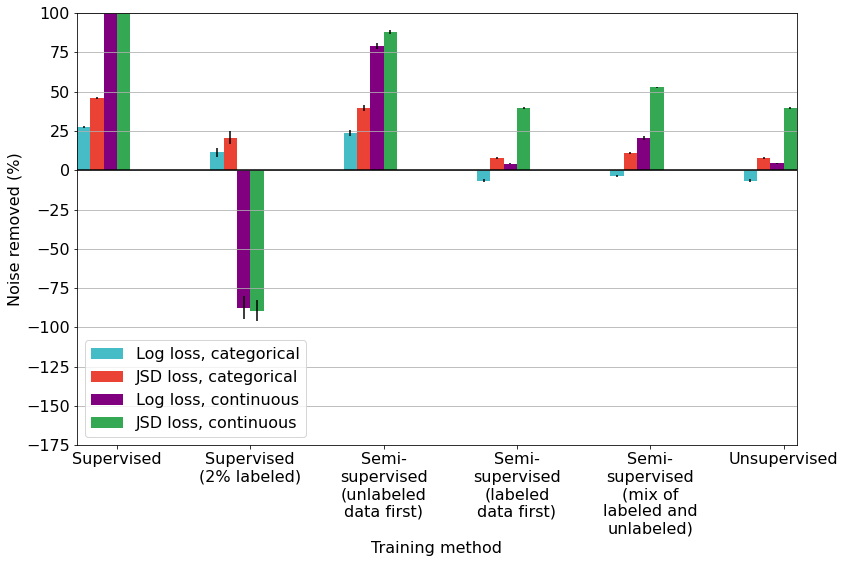

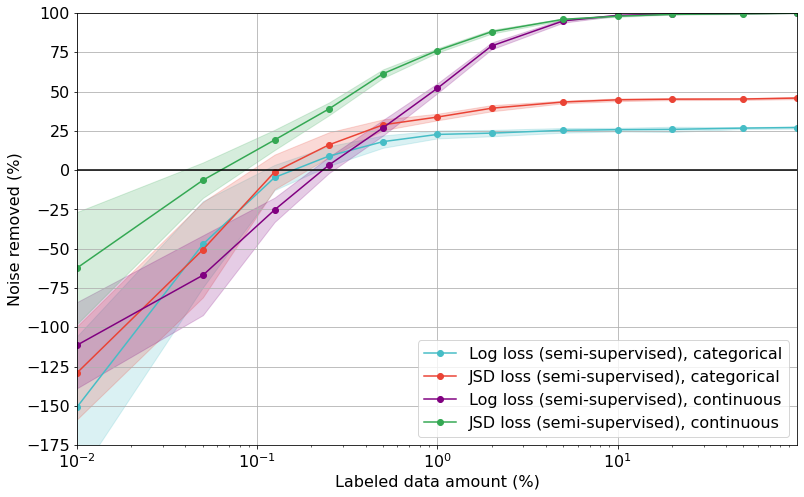

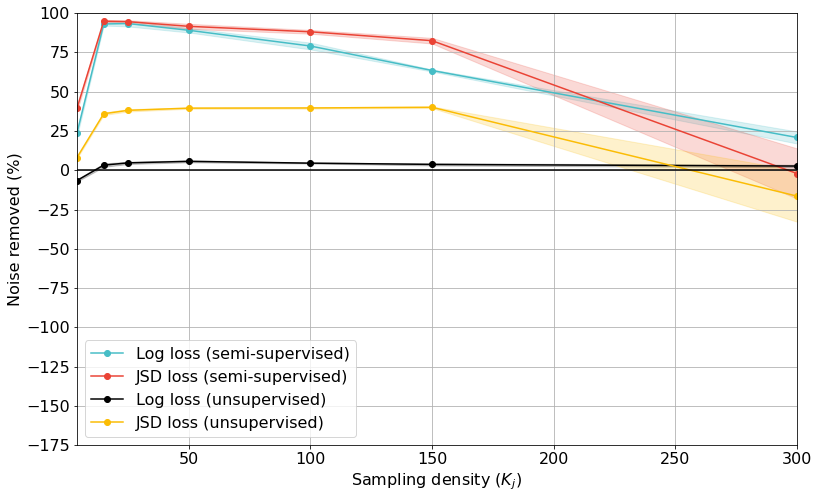

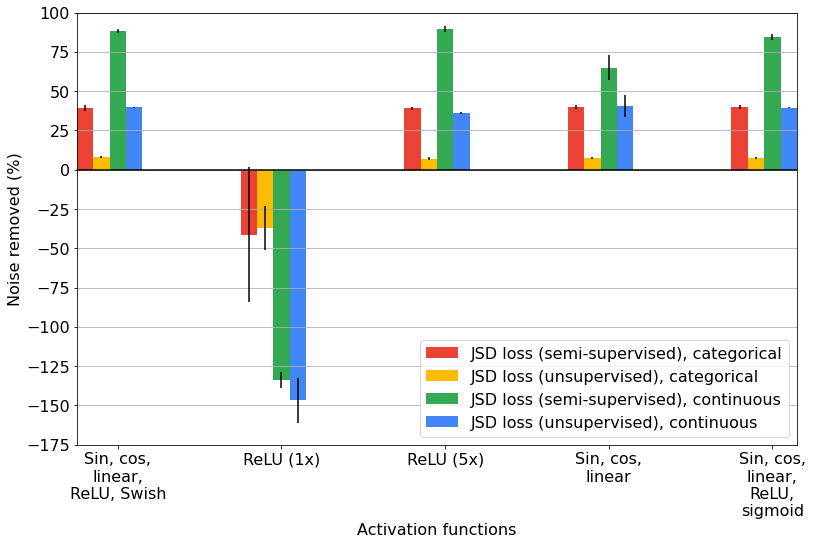

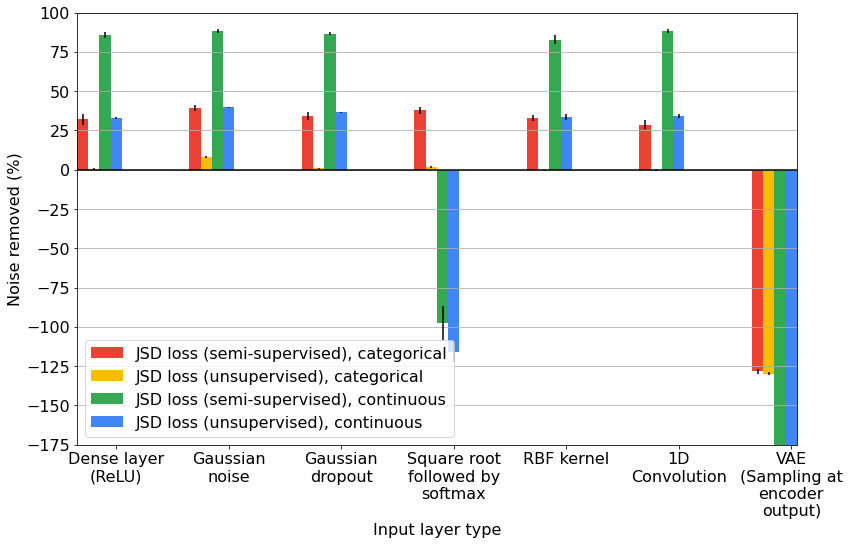

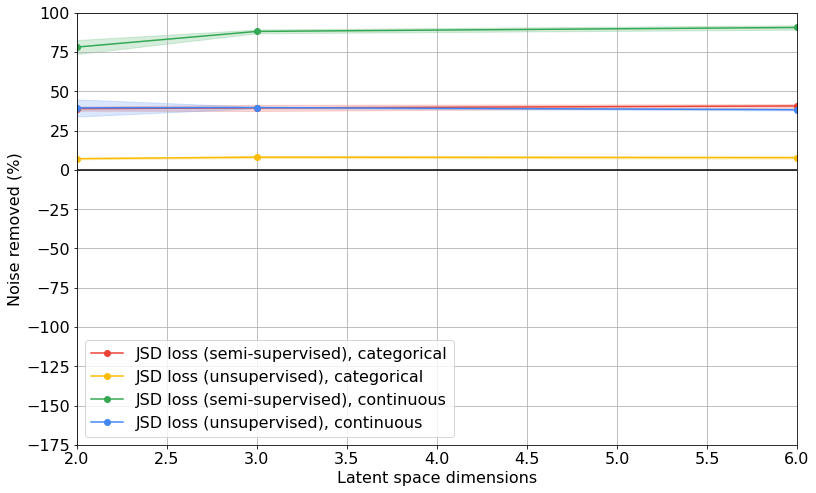

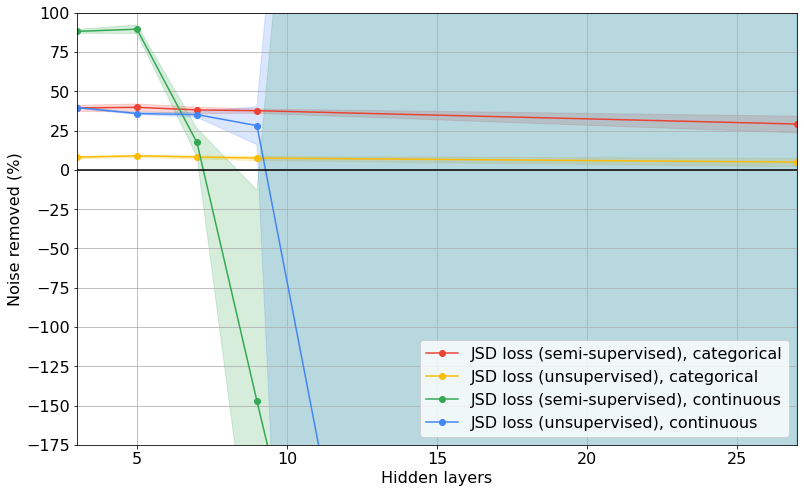

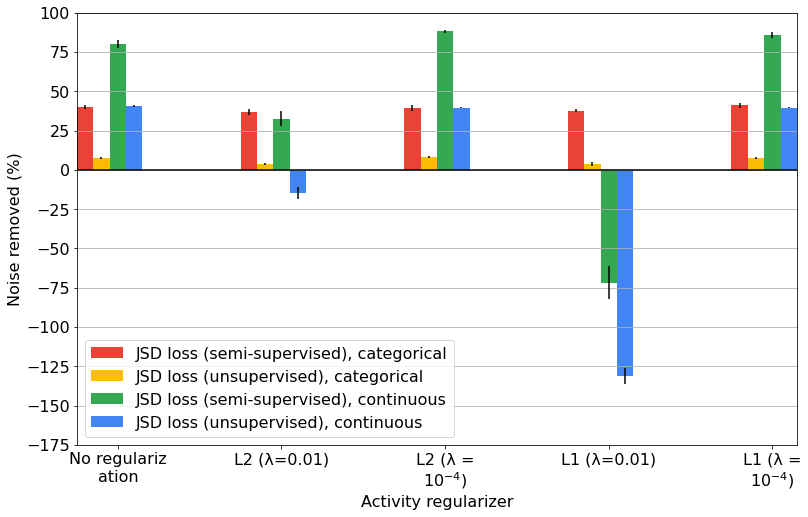

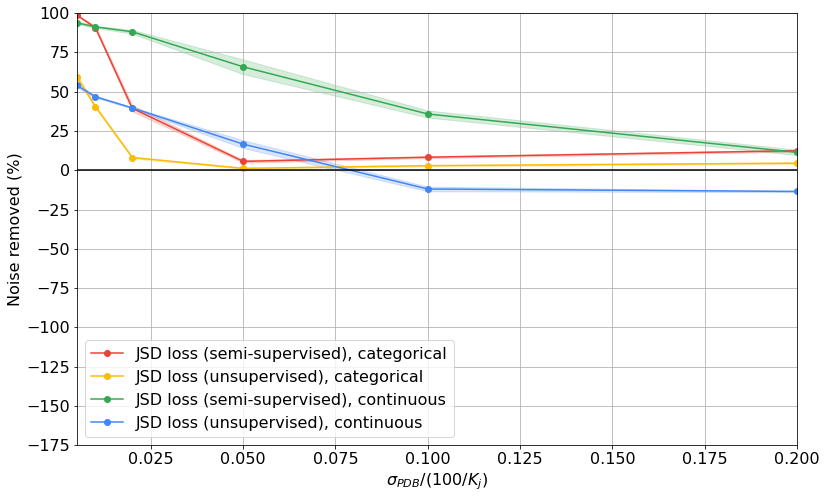

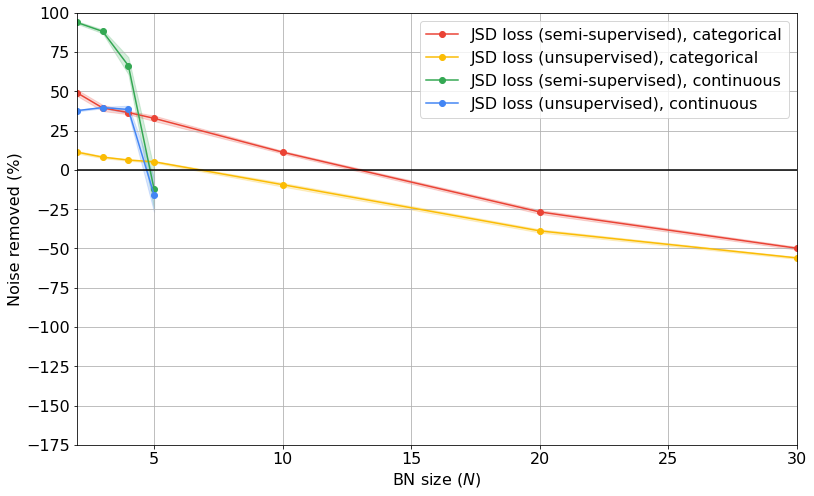

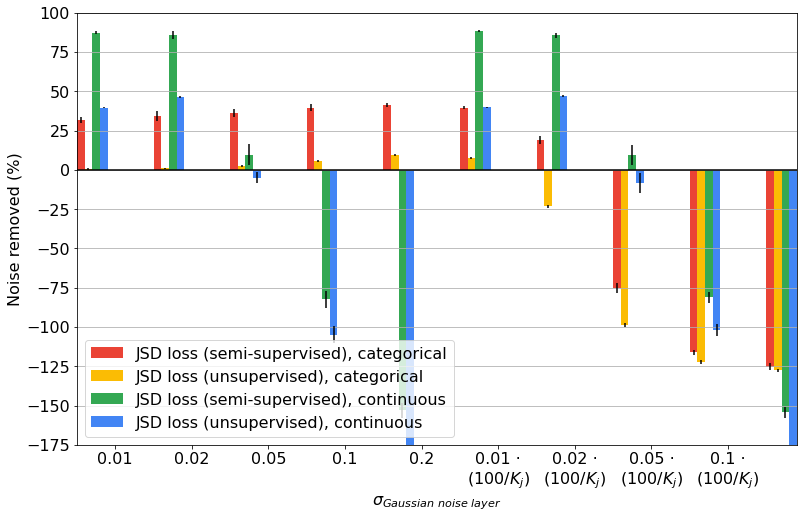

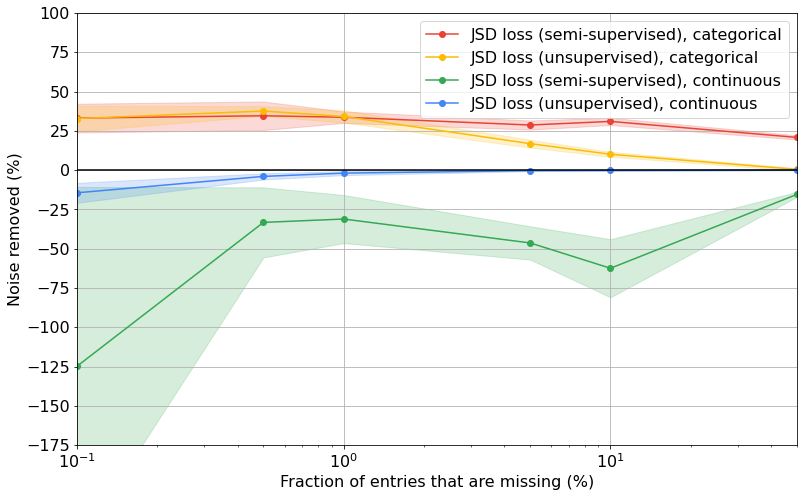

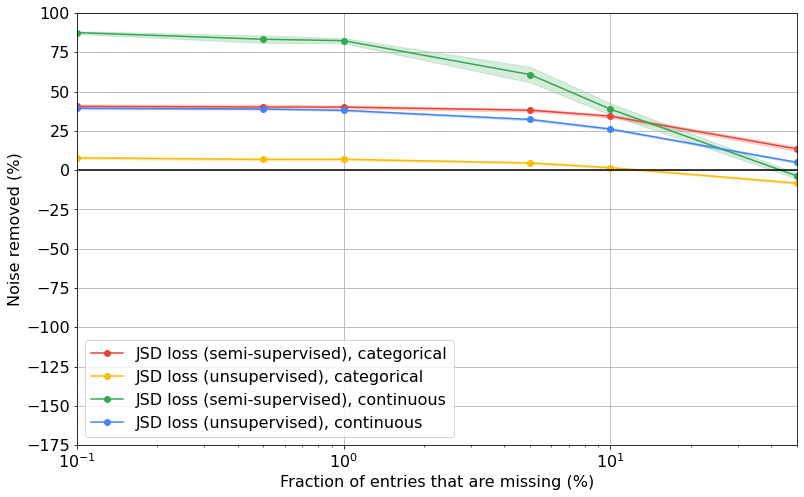

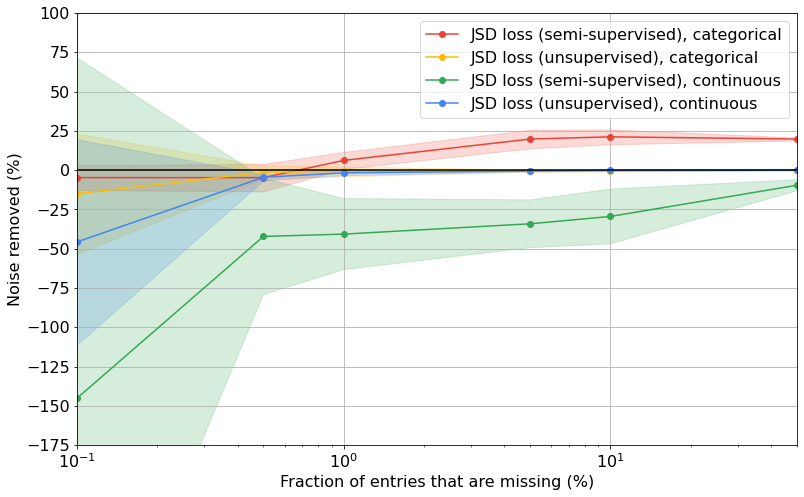

In [48]:
font = {
        # 'family' : 'serif',
        # 'serif':'test',
        # 'serif': 'cmr10',
        # 'serif': 'Latin Modern Roman',
        'weight' : 'normal',
        'size'   : 16}
matplotlib.rc('font', **font)
matplotlib.rc('text',usetex=False)
for i in range(len(parameters)):
# for i in [0]:
    if i not in [0,1,2]:
        excluded_config_strings=['CCE, SD=4', 'CCEu, SD=4', 'CCE, SD=100','CCEu, SD=100']
    else:
        excluded_config_strings=[]
    plot_vals(i,USE_PLOTLY=False,excluded_config_strings=excluded_config_strings)
    plt.savefig("pictures/results_fig_"+ parameters[i] + ".svg", bbox_inches = 'tight',pad_inches = 0)

In [36]:
for i in range(len(parameters)):
    if i not in [0,1,2]:
        excluded_config_strings=['CCE, SD=4', 'CCEu, SD=4', 'CCE, SD=100','CCEu, SD=100']
    else:
        excluded_config_strings=[]
    plot_vals(i,USE_PLOTLY=True,excluded_config_strings=excluded_config_strings)

UnboundLocalError: local variable 'ax' referenced before assignment

In [6]:
# a=[len(experiment_config_results[x['mapping']]) for i,x in enumerate(experiments)]
# unique, counts = np.unique(a, return_counts=True)
# dict(zip(unique, counts))


# [str(i) + ": " + x['full_string'] + " --- " +  str(len(experiment_config_results[x['mapping']])) for i,x in enumerate(experiments)]

[str(i) + ": " +  str(len(experiment_config_results[x['mapping']])) for i,x in enumerate(experiments)]

['0: 12',
 '1: 12',
 '2: 12',
 '3: 12',
 '4: 12',
 '5: 13',
 '6: 12',
 '7: 12',
 '8: 12',
 '9: 12',
 '10: 12',
 '11: 12',
 '12: 12',
 '13: 12',
 '14: 12',
 '15: 11',
 '16: 11',
 '17: 11',
 '18: 12',
 '19: 11',
 '20: 11',
 '21: 10',
 '22: 10',
 '23: 10',
 '24: 10',
 '25: 11',
 '26: 11',
 '27: 11',
 '28: 11',
 '29: 11',
 '30: 12',
 '31: 11',
 '32: 11',
 '33: 11',
 '34: 11',
 '35: 11',
 '36: 11',
 '37: 11',
 '38: 11',
 '39: 11',
 '40: 11',
 '41: 11',
 '42: 11',
 '43: 11',
 '44: 11',
 '45: 11',
 '46: 11',
 '47: 11',
 '48: 11',
 '49: 11',
 '50: 11',
 '51: 10',
 '52: 11',
 '53: 11',
 '54: 11',
 '55: 11',
 '56: 11',
 '57: 11',
 '58: 11',
 '59: 11',
 '60: 11',
 '61: 11',
 '62: 11',
 '63: 11',
 '64: 11',
 '65: 11',
 '66: 11',
 '67: 11',
 '68: 10',
 '69: 11',
 '70: 11',
 '71: 11',
 '72: 11',
 '73: 11',
 '74: 11',
 '75: 11',
 '76: 11',
 '77: 11',
 '78: 11',
 '79: 11',
 '80: 11',
 '81: 11',
 '82: 12',
 '83: 12',
 '84: 10',
 '85: 11',
 '86: 10',
 '87: 10',
 '88: 12',
 '89: 12',
 '90: 12',
 '91: 12'